In [27]:
# %load_ext autoreload
# %autoreload 1
import sys
from ast import literal_eval
setupFlag = False ## Set flag to True if these aren't installed
if setupFlag:
    !{sys.executable} -m pip install astroquery
    ## https://github.com/astropy/astroquery
    !{sys.executable} -m pip install eleanor
    ## https://github.com/afeinstein20/eleanor
    !{sys.executable} -m pip install lightkurve
    ## https://github.com/KeplerGO/lightkurve
    !{sys.executable} -m pip install sncosmo

In [2]:
from useful_functions import *
from emceeHammer import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import emcee
import corner
np.random.seed(27)
savePNG = False ## Changes matplotlib backend to save plots as pgf (default:True)
if savePNG:
    mpl.use("agg")
    plotFile = str('.png')
elif not savePNG:
    mpl.use("pgf")
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,})
    plotFile = str('.pdf')

notebookPlotFlag = False ## Changes Jupyter plotting backend (default:True)
if notebookPlotFlag:
    %matplotlib notebook
elif not notebookPlotFlag:
    %matplotlib inline


gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [3]:
tess_2020bpi_s21_dir = './Fausnaugh/sector21/cam3_ccd2/lc/lc_2020bpi_cleaned'
tess_2020bpi_s21 = lcImport(tess_2020bpi_s21_dir)[::2].reset_index(drop=True)
tess_2020bpi_s21_dir_a = './Fausnaugh_Updated/sector21/cam3_ccd2/lc/lc_2020bpi_cleaned'
tess_2020bpi_s21_a = lcImport(tess_2020bpi_s21_dir_a)
tess_2020bpi_s21['mjd'] = Time(tess_2020bpi_s21['BTJD']+2457000.0, format='jd').mjd
tess_2020bpi_s21_a['mjd'] = Time(tess_2020bpi_s21_a['BTJD']+2457000.0, format='jd').mjd
tess_2020bpi_s21['bkg_flux'] = tess_2020bpi_s21['bkg']/(((tess_2020bpi_s21['BTJD'].max() - tess_2020bpi_s21['BTJD'].min())/len(tess_2020bpi_s21['BTJD']))*u.d).to_value('s')/np.pi * 5.25**2
tess_2020bpi_s21_a['bkg_flux'] = tess_2020bpi_s21_a['bkg']/(((tess_2020bpi_s21_a['BTJD'].max() - tess_2020bpi_s21_a['BTJD'].min())/len(tess_2020bpi_s21_a['BTJD']))*u.d).to_value('s')/np.pi * 5.25**2
tess_2020bpi_s21_a['flux'] = tess_2020bpi_s21_a['cts']/(((tess_2020bpi_s21_a['BTJD'].max() - tess_2020bpi_s21_a['BTJD'].min())/len(tess_2020bpi_s21_a['BTJD']))*u.d).to_value('s')/np.pi * 5.25**2
tess_2020bpi_s21_a['e_flux'] = tess_2020bpi_s21_a['e_cts']/(((tess_2020bpi_s21_a['BTJD'].max() - tess_2020bpi_s21_a['BTJD'].min())/len(tess_2020bpi_s21_a['BTJD']))*u.d).to_value('s')/np.pi * 5.25**2

tess_2020bpi_s22_dir = './Fausnaugh/sector22/cam3_ccd1/lc/lc_2020bpi_cleaned'
tess_2020bpi_s22 = lcImport(tess_2020bpi_s22_dir)[::2]
tess_2020bpi_s22_dir_a = './Fausnaugh_Updated/sector22/cam3_ccd1/lc/lc_2020bpi_cleaned'
tess_2020bpi_s22_a = lcImport(tess_2020bpi_s22_dir_a)
tess_2020bpi_s22['mjd'] = Time(tess_2020bpi_s22['BTJD']+2457000.0, format='jd').mjd
tess_2020bpi_s22_a['mjd'] = Time(tess_2020bpi_s22_a['BTJD']+2457000.0, format='jd').mjd
tess_2020bpi_s22['bkg_flux'] = tess_2020bpi_s22['bkg']/(((tess_2020bpi_s22['BTJD'].max() - tess_2020bpi_s22['BTJD'].min())/len(tess_2020bpi_s22['BTJD']))*u.d).to_value('s')/np.pi * 5.25**2
tess_2020bpi_s22_a['bkg_flux'] = tess_2020bpi_s22_a['bkg']/(((tess_2020bpi_s22_a['BTJD'].max() - tess_2020bpi_s22_a['BTJD'].min())/len(tess_2020bpi_s22_a['BTJD']))*u.d).to_value('s')/np.pi * 5.25**2
tess_2020bpi_s21s22 = pd.concat([tess_2020bpi_s21,tess_2020bpi_s22])
tess_2020bpi_s21.head()

BTJD         TJD         cts      e_cts         bkg  bkg_model  \
0  1870.44408  1870.43788  -5339.0302  1368.8706 -63381.0890  1502.1435   
1  1870.46491  1870.45871  -6841.1413  1375.3282 -60025.0642  1502.1435   
2  1870.48574  1870.47954  -2219.7583  1400.7610 -54125.0260  1501.2344   
3  1870.50658  1870.50038 -10843.6913  1370.6601 -58992.6986  1501.2344   
4  1870.52741  1870.52121  -9069.4821  1365.9754 -65639.4792  1501.2344   

        bkg2     e_bkg2          mjd    bkg_flux  
0  4466.8645  1368.8706  58869.94408 -297.393636  
1 -1132.7160  1375.3282  58869.96491 -281.646661  
2  3038.3737  1400.7610  58869.98574 -253.962791  
3 -1349.6968  1370.6601  58870.00658 -276.802646  
4  3397.6044  1365.9754  58870.02741 -307.990344

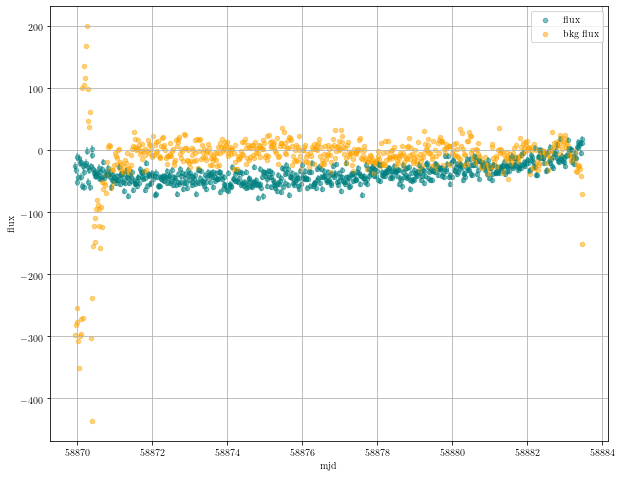

In [4]:
fig,ax = plt.subplots(figsize=(10,8))
tess_2020bpi_s21_a[tess_2020bpi_s21_a.mjd < 58884].plot('mjd','flux',yerr='e_flux',kind='scatter',color='teal',alpha=0.5,ax=ax,label='flux')
tess_2020bpi_s21_a[tess_2020bpi_s21_a.mjd < 58884].plot('mjd','bkg_flux',kind='scatter',alpha=0.5,color='orange',ax=ax,label='bkg flux')
ax.set_xlabel('mjd');
ax.set_ylabel('flux');
#ax.set_title('SN 2020bpi Sector 21 - First Orbit')
ax.grid();
ax.legend();
#fig.savefig('./plots/TESS_Sector21_bkg_flux_Comparison(noTitle).png')

In [34]:
ab = sncosmo.get_magsystem('ab')
tess_response = pd.read_csv('./tess_response_curve.csv',header=0,names=['wl_nm','trans'],engine='python' )
tess_response['wl_ang'] = (np.array(tess_response['wl_nm']) * u.nm).to_value('angstrom')

atlaso_response = pd.read_csv('./atlas_o.csv',header=0,names=['wl_ang','trans'])

ztf_2020bpi = pd.read_csv('./JhaData/ztf_SN2020bpi.csv',header=0,engine='python' )
ztf_2020bpi['BTJD'] = Time(ztf_2020bpi['mjd'],format='mjd').jd - 2457000.0
# sn2020bpi_ztf['magap_rolling'] = sn2020bpi_ztf['magap'].rolling(12).median()
# ztf_2020bpi['flux'] = [ab.band_mag_to_flux(ztf_2020bpi['magap'][i], 'ztfr') for i in range(len(ztf_2020bpi['magap']))]
# sn2020bpi_ztf['flux_rolling'] = sn2020bpi_ztf['flux'].rolling(12).median()
# ztf_2020bpi = pd.read_csv('JhaData/ztf_SN2020bpi.csv')

# ztf_2020bpi['e_flux'] = [eval(item) for item in ztf_2020bpi.e_flux.to_numpy()]
# ztf_2020bpi['e_flux_tuple'] = [literal_eval(item) for item in ztf_2020bpi.e_flux.to_numpy()]

# ztf_2020bpi.to_csv('JhaData/ztf_SN2020bpi.csv',index=False)
sn2020bpi_atlas = pd.read_csv('./sn2020bpi_atlas.csv',header=0,engine='python' )
sn2020bpi_atlas.replace(to_replace='orange-ATLAS',value='orange',inplace=True) ## covers 560-820 nm (closest to tess)
sn2020bpi_atlas.replace(to_replace='cyan-ATLAS',value='cyan',inplace=True) ## covers 420-650 nm
atlas_o = sn2020bpi_atlas[sn2020bpi_atlas.FLT == 'orange']
# ztf_2020bpi['e_flux_tuple']

In [35]:
def interp_mjd(data,argData,data_index='time',arg_index='time'):
    ## More generalized version of interpToMatch(). Takes an argument for a reference
    ## DataFrame and a variable number of DataFrames to be interpolated so that
    ## they match the time sampling of the reference DataFrame. Like interpToMatch(),
    ## DataFrames must have a 'time' column of an integer or float type.
    ## Function returns an array containing the reference DataFrame as the first
    ## item followed by the interpolated DataFrames in the order in which they were
    ## passed to the function
    interpArray = []
    interpArray.append(data)
    
    data_indexed = data.set_index(str(data_index))
    data_length = len(data_indexed.index)
    minun = data_indexed.index.min()
    plusle = data_indexed.index.max()
    newIndex = data_indexed.index
    
    arg_indexed = argData.set_index(str(arg_index))
    arg_interp = pd.DataFrame(index=newIndex)
    arg_interp.index.name = arg_indexed.index.name
    for colname, col in arg_indexed.iteritems():
        arg_interp[colname] = np.interp(newIndex,arg_indexed.index,col)
    arg_interp.reset_index(inplace=True)
    return arg_interp

In [49]:
def correctionModel(params,data, modelType):
    if modelType == 'basic':
        model = params[0] * data.flux.to_numpy() + params[1]
        var = data.e_flux.to_numpy()**2
    elif modelType == 'bkg_frac':
        model = params[0] * data.flux.to_numpy() + params[1] - params[2]*data.bkg_model_flux.to_numpy()
        var = (data.e_flux.to_numpy())**2
    elif modelType == 'shiftOnly':
        model = data.flux.to_numpy() + params[0]
        var = (data.e_flux.to_numpy())**2
    return model,var
def log_prior(params):
    logpr = 0.
    if params[0] < 0:
        return -np.inf
#     if params[0] > 2:
#         return -np.inf
#     if params[1] > params[0]:
#         return -np.inf
    if len(params) > 2: ##sloppy
        if params[2] < 0:
            return -np.inf
    return logpr
def log_likelihood(params,data,refData,modelType):
    model,var = correctionModel(params,data,modelType)
#     tRange = (data.mjd.min(),data.mjd.max())
#     refDataCut = refData.query('mjd > @tRange[0] & mjd < @tRange[1]')
    logl = pd.eval(-0.5 * (np.sum(np.log(2 * np.pi * var) + 
                    (refData.flux.to_numpy() - model)**2 / var) ))
        
    return logl

def log_posterior(params,data,refData,modelType):
    logpr = log_prior(params)
#     return logpr + log_likelihood(params,data,refData,modelType)
    if logpr == -np.inf:
        return logpr
    else:
        return logpr + log_likelihood(params,data,refData,modelType)

def doMCMC(data,refData, 
           guess, scale, 
           nwalkers=50, nburn=500, nsteps=1000,
           modelType='basic', plotCorner=True,
           dataType='TESS',savePlots=False,fileNameExtras='-lcAdj',plotExt='.pdf'):
    print('model: '+str(modelType))
    ndim = len(guess)
#     assert ndim == len(scale)
    starting_guesses = np.random.randn(nwalkers, ndim)*scale + guess
    
    print('sampling...')
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, 
                                    threads=-1, args=[data,refData,modelType])
    sampler.run_mcmc(starting_guesses, nsteps, progress="notebook")
    print('done')
    tlabels = [r"scale", 
               r"shift",
               "bkg mod"
           ]
    samples = sampler.chain[:, nburn:, :].reshape((-1, ndim))
    sampler.reset()
    if plotCorner:
        figcorner = corner.corner(samples, labels=tlabels[0:ndim],
                        show_titles=True, title_fmt=".6f", verbose=True,
                        title_kwargs={"fontsize": 11}, label_kwargs={"fontsize": 14})
        
    if savePlots:
        dirString = np.str('./plots/lcAdj/'+np.str(dataType)+'/corner/')
        mkdir(dirString)
        fileName = np.str('lcFit-'+'-nparam-'+np.str(len(guess)+1)+'-nwalk-'+np.str(nwalkers)+'-nstep-'+np.str(nsteps)+fileNameExtras)
        figcorner.savefig(dirString+fileName+plotExt)
        figcorner.savefig(dirString+fileName+'.png')

    return samples

In [50]:
# guess = [0.7,0.04]
# scale = [0.1,0.01]
# doMCMC(sn2020bpi_s21s22_interpolated.query('mjd < @sn2020bpi_s21.mjd.max()').reset_index(),
#       sn2020bpi_ztf_r.query('mjd < @sn2020bpi_s21.mjd.max()').reset_index(),
#       guess, scale,
#       nwalkers=6,nburn=250,nsteps=1000);

In [51]:
def lcEmcee(dataPD,refDataPD, guess, scale, 
                 nwalkers=50, nburn=500, nsteps=1000,
                 modelType='basic',plotCorner=True,
               dataType='TESS',savePlots=False,fileNameExtras='-lcAdj',plotExt='.pdf'):
    ## Function assumes data arg is Fausnaugh provided data that is already in a
    ## DataFrame format and then applies a scale and shift factor based on the 
    ## supplied refData arg. Returns both the new dataFrame and the sampled values
    ## from MCMC. Make sure refDataPD is formatted to include an mjd column
    ## Ensure it only includes data from the relevant band (e.g. for ztf, 'fid==2')
    data = dataPD.copy()
    refData = refDataPD.copy()
    data['mjd'] = Time(data['BTJD']+2457000.0, format='jd').to_value('mjd')
    tess_interval = (((data['BTJD'].max() - data['BTJD'].min())/len(data['BTJD']))*u.d).to_value('s')
    tess_area = np.pi * 5.25**2 ## unsure about correct value, doesn't necessarily matter
    ##ask about whether this is the best option or if I should just go straight from
    ## cts to flux
    ## defining the flux as below because otherwise raw flux is orders of magnitude larger than adjusted flux
    ## https://heasarc.gsfc.nasa.gov/docs/tess/the-tess-space-telescope.html
    flux = np.array(data['cts'] / tess_interval / tess_area).astype(float)
    flux_error = np.array(data['e_cts'] / tess_interval / tess_area).astype(float)
    data['flux'] = flux
    data['e_flux'] = flux_error
    data['bkg_model_flux'] = np.array(data['bkg_model'] / tess_interval / tess_area)
    data['bkg_flux'] = np.array(data['bkg'] / tess_interval / tess_area)
    #print(data.dtypes)
    tRange = (data.mjd.min(),data.mjd.max())
    #refData = refData.query('mjd > @tRange[0] & mjd < @tRange[1]').reset_index()
    #display(data)
    data_interpolated = interp_mjd(data=refData,argData=data,
                                   data_index='mjd',arg_index='mjd')
#     refData_interpolated = interp_mjd(data=data,argData=refData,
#                                       data_index='mjd',arg_index='mjd')
## interpolating the refData is currently broken
    samples = doMCMC(data_interpolated,refData,
                     guess,scale,
                     nwalkers,nburn,nsteps,
                     modelType=modelType,plotCorner=plotCorner,savePlots=savePlots,fileNameExtras=fileNameExtras,plotExt=plotExt)
    return data, samples

In [52]:
def lcAdjustment(dataPD,refDataPD, guess, scale, 
                 nwalkers=50, nburn=500, nsteps=1000,
                 modelType='basic',plots=True,
               dataType='TESS',savePlots=False,fileNameExtras='',plotExt=None):
    
    mcLC,samples = lcEmcee(dataPD,refDataPD, guess, scale, 
                   nwalkers, nburn, nsteps,
                   modelType,plots, dataType,savePlots,fileNameExtras,plotExt)
    sampPD = pd.DataFrame(samples)
    if modelType == 'basic':
        sampPD.columns = ['scale','shift']
    elif modelType == 'bkg_frac':
        sampPD.columns = ['scale','shift','bkg']
    medianParams = [np.median(samples[:,i]) for i in range(len(samples[0]))]
    cleanLC = pd.DataFrame()
    cleanLC['BTJD'] = mcLC.BTJD
    cleanLC['mjd']= mcLC.mjd
    cleanLC['cts'] = mcLC.cts
    cleanLC['e_cts'] = mcLC.e_cts
    cleanLC['bkg_model'] = mcLC.bkg_model
    cleanLC['raw_flux'] = mcLC.flux
    cleanLC['e_raw_flux'] = mcLC.e_flux
    cleanLC['bkg_flux'] = mcLC.bkg_flux
    cleanLC['bkg_model'] = mcLC.bkg_model_flux
    cleanLC['flux'], var = correctionModel(medianParams,mcLC, modelType)
    if len(medianParams) == 1:
        cleanLC['shift'] = medianParams[0]
        cleanLC['e_flux'] = cleanLC['e_raw_flux']
    elif len(medianParams) > 1:
        cleanLC['e_flux'] = medianParams[0]*mcLC.e_flux
        cleanLC['scale'] = medianParams[0]
        cleanLC['shift'] = medianParams[1]
    if len(medianParams) > 2:
        cleanLC['bkg_frac'] = medianParams[2]
#     dummyPD = pd.DataFrame()
#     dummyPD['flux'] = mcLC.e_flux
#     dummyPD['e_flux'] = mcLC.e_flux
#     dummyPD['bkg_model_flux'] = mcLC.bkg_model_flux
    #cleanLC['e_flux'],var = correctionModel(medianParams,dummyPD, modelType)
    #display(cleanLC)
    if plots:
        fig,ax = plt.subplots(figsize=(8,8))
        ax.grid()
        offsetArray = [literal_eval(tuple) for tuple in refDataPD[refDataPD.mjd > cleanLC.mjd.min()][refDataPD.mjd < cleanLC.mjd.max()].e_flux_tuple.to_numpy()]
        print(offsetArray)
        offsets =[ np.array(np.abs(float(offsetArray[ind][0])),
                    np.abs(float(offsetArray[ind][1]))) for ind in range(len(offsetArray))]
#         print(offsets)
        mcLC.plot('mjd','flux',yerr='e_flux',kind='scatter',color='grey',alpha=0.5,label='Original TESS',ax=ax)
        cleanLC.plot('mjd','flux',yerr='e_flux',kind='scatter',color='darkblue',alpha=0.75,ax=ax,label='Corrected TESS')
        ax.errorbar(refDataPD[refDataPD.mjd > cleanLC.mjd.min()][refDataPD.mjd < cleanLC.mjd.max()].mjd.values,
                   refDataPD[refDataPD.mjd > cleanLC.mjd.min()][refDataPD.mjd < cleanLC.mjd.max()].flux.values,
                   yerr=offsets, elinewidth=2,markersize=5,#capsize=3, 
                   fmt='o', color='orange',ecolor='orange',label='ZTF')
        #refDataPD[refDataPD.mjd > cleanLC.mjd.min()][refDataPD.mjd < cleanLC.mjd.max()].plot('mjd','flux',yerr='e_flux', kind='scatter',color='orange',label='ztf',ax=ax)
#         divider = make_axes_locatable(ax)
#         ax2 = divider.append_axes("bottom",size="25%",pad=0.03)
#         ax.figure.add_axes(ax2)
#         data_interpolated = interp_mjd(data=refDataPD[refDataPD.mjd > cleanLC.mjd.min()][refDataPD.mjd < cleanLC.mjd.max()],argData=mcLC,
#                                data_index='mjd',arg_index='mjd')
#         residual = data_interpolated.flux - refDataPD[refDataPD.mjd > cleanLC.mjd.min()][refDataPD.mjd < cleanLC.mjd.max()].flux 
#         ax2.scatter(data_interpolated.mjd, residual,
#         alpha=1, color='grey',s=1)
#         ax2.grid()
        if modelType =='basic':
            anchText1 = mpl.offsetbox.AnchoredText('Scale Factor: '+np.str(medianParams[0])+
                     '\n'+'Vertical Shift: '+np.str(medianParams[1]),loc=4,borderpad=1)
        if modelType =='bkg_frac':
            anchText1 = mpl.offsetbox.AnchoredText('Scale Factor: '+np.str(np.around(medianParams[0],3))+
                     '\n'+'Vertical Shift: '+np.str(np.around(medianParams[1],3))+
                     '\n'+'Background Fraction: '+np.str(np.around(medianParams[2],3)) ,loc=4,borderpad=1)
        elif modelType == 'shiftOnly':
            anchText1 = mpl.offsetbox.AnchoredText('Vertical Shift: '+np.str(medianParams[0]),loc=4,borderpad=1)
        ax.add_artist(anchText1)
        ax.legend()
        ax.grid()
        plt.xlabel("mjd");
    if savePlots:
        dirString = np.str('./plots/lcAdj/'+np.str(dataType)+'/fitmodel/')
        mkdir(dirString)
        fileName = np.str('mod-'+np.str(modelType)+'-nparam-'+np.str(len(guess))+'-nwalk-'+np.str(nwalkers)+'-nstep-'+np.str(nsteps)+np.str(fileNameExtras))
        fig.savefig(dirString+fileName+plotExt)
        fig.savefig(dirString+fileName+'.png')
        dirString = np.str('./fitPD/lcAdj/'+np.str(dataType)+'/fitmodel/')
        mkdir(dirString)
        cleanLC.to_csv(dirString+fileName+'.csv',index=False)
    return cleanLC, sampPD

model: bkg_frac
sampling...



done
[(0.002628163767600394, 0.003223832161130714), (0.0023129338055085068, 0.0028946976073013723), (0.0023797689104727814, 0.002741920034638759), (0.0028844699689605166, 0.003562099310207071), (0.00245268546717093, 0.0027966740782900297), (0.0023362237266854775, 0.002690261091044685), (0.0023655409222016355, 0.002723770205617211), (0.0027429906947237653, 0.0029828013678331114), (0.0029046946519563493, 0.003186988412882466), (0.0030091616616509873, 0.0032488190281379503), (0.0030643158453210403, 0.0032720017418406827), (0.0028631458110869867, 0.003067916018710995), (0.0027942272918957817, 0.0029893841589376663), (0.0028761771726674573, 0.003034000405049808), (0.002836429134854518, 0.0029865647738614373), (0.00416219577167392, 0.004460283898528324), (0.0036274185676462567, 0.0038466057005165644), (0.00530028143492612, 0.005752530505159448), (0.005270976191701582, 0.0056761132715927864), (0.005043377409596067, 0.005412544370391112), (0.004946060552816212, 0.0053032173755099), (0.0067185

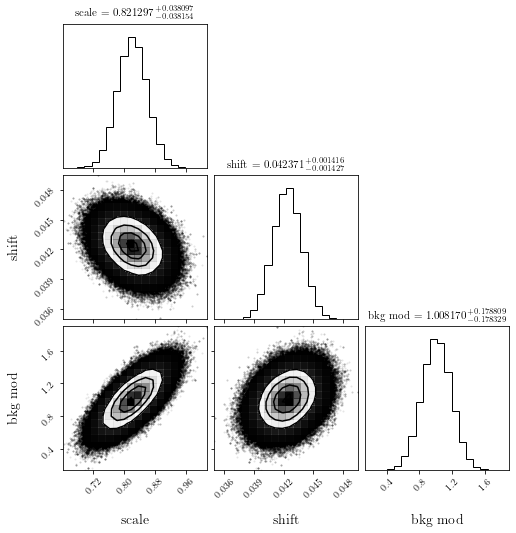

In [53]:
guess = [0.8,0.1,0.1]
scale = [0.1,0.01,0.01]
# bpi_orig_scaled = lcAdjustment(sn2020bpi_s21,
#              sn2020bpi_ztf.query('fid == 2').reset_index(),
#              guess, scale,modelType='bkg_frac',nwalkers=50,nburn=500,nsteps=1000)
bpi_updated_scaled, samples = lcAdjustment(tess_2020bpi_s21_a,
                                           ztf_2020bpi,
                                           guess, scale,modelType='bkg_frac',
                                           nwalkers=50,nburn=10000,nsteps=60000,
                                           savePlots=True,dataType='TESS',
                                           fileNameExtras='-forThesis',plotExt='.pdf')

In [ ]:
# ax = bpi_orig_scaled.plot('mjd','flux',color='green',kind='scatter',label='original')
# bpi_updated_scaled.plot('mjd','flux',color='orange',kind='scatter',ax=ax,label='updated')
# sn2020bpi_ztfn.plot('mjd','flux',color='black',kind='scatter',ax=ax,label='ztf')

In [ ]:
# ax = sn2020bpi_s21.plot('mjd','bkg_model_flux',kind='scatter',color='blue')
# sn2020bpi_s21_a.plot('mjd','bkg_model_flux',kind='scatter',ax=ax,color='red')

In [21]:
params = [1,2,3]
if len(params) >3:
    if params[3] ==3:
        print('おめだとう')
else:
    print('がんばって')

がんばって
